In [1]:
import numpy as np
from numpy import random
from collections import deque
import matplotlib.pyplot as plt
import HMM
import pandas as pd

# Benchmark of vectorization

In [2]:
pi=np.array([.3,.3,.4])
A=np.array([[.2,.3,.5],[.1,.5,.4],[.6,.1,.3]])
B=np.array([[0.1,0.5,0.4],[0.2,0.4,0.4],[0.3,0.6,0.1]])
states,sequence=HMM.sim_HMM(A,B,pi,100)

In [3]:
%timeit HMM.Baum_Welch(A,B,pi,sequence,1000,0,scale=True)
%timeit HMM.hmm_unoptimized.Baum_Welch(A,B,pi,sequence,1000,0,scale=True)
%timeit HMM.Baum_Welch(A,B,pi,sequence,1000,0,scale=False)
%timeit HMM.hmm_unoptimized.Baum_Welch(A,B,pi,sequence,1000,0,scale=False)

1 loop, best of 3: 2.39 s per loop
1 loop, best of 3: 3.96 s per loop
1 loop, best of 3: 975 ms per loop
1 loop, best of 3: 2.51 s per loop


# Simulations

## Effect of chain length

In [4]:
A=np.array([[0.1,0.5,0.4],[0.3,0.5,0.2],[0.7,0.2,0.1]])
B=np.array([[0.1,0.1,0.1,0.7],[0.5,0.5,0,0],[0.7,0.1,0.1,0.1]])
pi=np.array([0.25,0.25,0.5])
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])

In [5]:
lengths=[50,100,200,500,1000]
acc=[]
k=30
for i in lengths:
    mean_acc=0
    for j in range(k):
        states,sequence=HMM.sim_HMM(A,B,pi,i)
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        mean_acc=mean_acc+np.mean(seq_hat==states)
    acc.append(mean_acc/k)

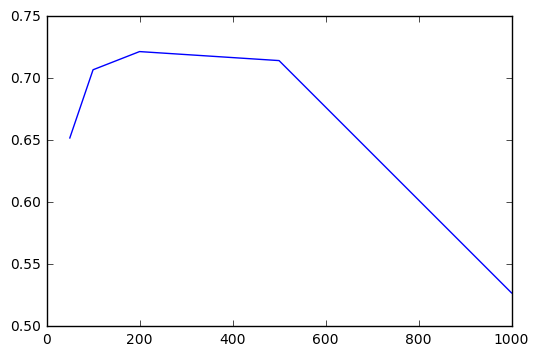

In [6]:
plt.plot(lengths,acc)

From the plot we can see that the length of the chain does have an effect on the performance of Baum-Welch Algorithm and Viterbi decoding. We can see that when the chain is too long, the algorithms tend to have a bad results. 

## Effects of initial values in Baum-Welch Algorithm

In [7]:
A=np.array([[0.1,0.5,0.4],[0.3,0.5,0.2],[0.7,0.2,0.1]])
B=np.array([[0.1,0.1,0.1,0.7],[0.5,0.5,0,0],[0.7,0.1,0.1,0.1]])
pi=np.array([0.25,0.25,0.5])

In [8]:
############INITIAL VALUES 1###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,False)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
print("Accuracy: ",np.mean(acc))

Accuracy:  0.7124


In [9]:
############INITIAL VALUES 2###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
print("Accuracy: ",np.mean(acc))

Accuracy:  0.29556


In [10]:
############INITIAL VALUES 3###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
np.mean(acc)

0.25476000000000004

In [11]:
############INITIAL VALUES 4###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.5,0.2,0.3])
k=50
acc=np.zeros(k)
for i in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,500)
    Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,10,0,True)
    seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
    acc[i]=np.mean(seq_hat==states)
np.mean(acc)

0.42936000000000002

From this part, we can see that the choice of initial values are greatly important. Because Baum-Welch algorithm does not guarantee global maximum, a bad choice of initial values will make Baum-Welch Algorithm to be trapped in a local maximum. Moreover, our experiments show that the initial values for emission matrix $B$ are more important by comparing initial values 3 and 4.

## Effect of number of iteration in Baum-Welch Algorithm

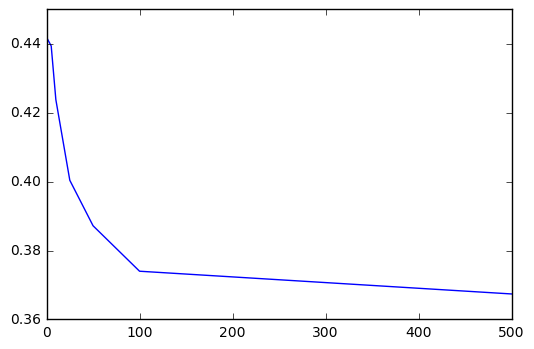

In [12]:
############INITIAL VALUES 1###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.3,0.3,0.4])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

In this initial condition, we can see one feature of Baum-Welch Algorithm: Baum-Welch Algorithm tends to overfit the data, which is $P(Y|\theta_{final})>P(Y|\theta_{true})$. 

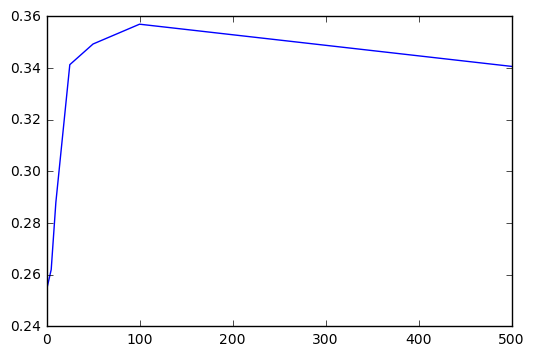

In [13]:
############INITIAL VALUES 2###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

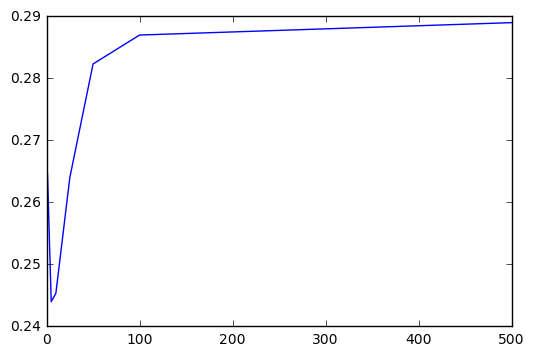

In [14]:
############INITIAL VALUES 3###############
A_init=np.array([[0.2,0.6,0.2],[0.25,0.5,0.25],[0.6,0.2,0.2]])
B_init=np.array([[0.3,0.4,0.2,0.1],[0.1,0.5,0.2,0.2],[0.1,0.1,0.4,0.4]])
pi_init=np.array([0.5,0.2,0.3])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

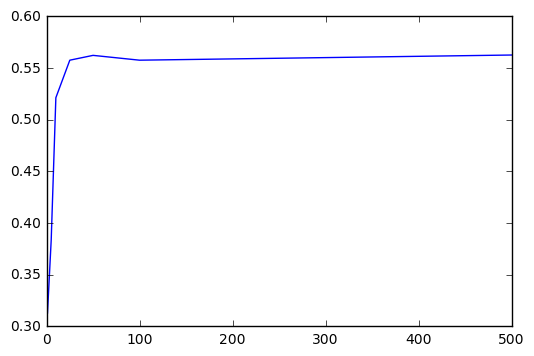

In [15]:
############INITIAL VALUES 4###############
A_init=np.array([[0.5,0.25,0.25],[0.1,0.4,0.5],[0.25,0.1,0.65]])
B_init=np.array([[0.05,0.1,0.15,0.7],[0.4,0.4,0.1,0.1],[0.6,0.2,0.2,0.2]])
pi_init=np.array([0.5,0.2,0.3])
n_iter=[1,5,10,25,50,100,500]
acc=np.zeros([k,len(n_iter)])
k=30
for j in range(k):
    states,sequence=HMM.sim_HMM(A,B,pi,100)
    t=0
    for i in n_iter:
        Ahat,Bhat,pihat=HMM.Baum_Welch(A_init,B_init,pi_init,sequence,i,0,False)
        seq_hat=HMM.Viterbi(Ahat,Bhat,pihat,sequence)
        acc[j,t]=np.mean(seq_hat==states)
        t+=1
plt.plot(n_iter,np.mean(acc,axis=0))

In other situations, increasing the number of iterations in Baum-Welch Algorithm tends to better fit the data.

# Applications

In [16]:
dat=pd.read_csv("data/weather-test2-1000.txt",skiprows=1,header=None)
dat.head(5)

,0,1
0,rainy,yes
1,foggy,no
2,sunny,no
3,sunny,no
4,sunny,no


In [17]:
seq=dat[1].map({"no":0,"yes":1}).tolist()
states=dat[0].map({"sunny":0,"rainy":1,"foggy":2})
initial_A=np.array([[0.7,0.2,0.1],[0.3,0.6,0.1],[0.1,0.6,0.3]])
initial_B=np.array([[0.9,0.1],[0.1,0.9],[0.4,0.6]])
initial_pi=np.array([0.4,0.4,0.2])
Ahat,Bhat,pihat=HMM.Baum_Welch(initial_A,initial_B,initial_pi,seq,max_iter=100,threshold=0,scale=True)
states_hat=HMM.Viterbi(Ahat,Bhat,pihat,seq)
print(np.mean(states_hat==states))

0.634
